In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import quad
from math import sqrt,pow,log
import pandas as pd
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,16)

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
#plt.style.use('/root/Github_Repos/HubbleConstant-ConstraintsForVCG/standard.mplstyle')

Importing data

In [2]:
!wget http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
d = np.genfromtxt('SCPUnion2.1_mu_vs_z.txt')
z = d.T[1]
dm = d.T[2]
errdm= d.T[3]
dlabel = 'SCP_2.1'
label = {"Z_SN":z,"DMdata_SN":dm,"Error_DM_SN":errdm}
data_SN=pd.DataFrame(label)
print(data_SN)
len(z)

URL transformed to HTTPS due to an HSTS policy
--2022-01-28 13:02:40--  https://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
Resolving supernova.lbl.gov (supernova.lbl.gov)... 128.3.28.88
Connecting to supernova.lbl.gov (supernova.lbl.gov)|128.3.28.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘SCPUnion2.1_mu_vs_z.txt.11’

SCPUnion2.1_mu_vs_z 100%[===================>]  33.10K   105KB/s    in 0.3s    

2022-01-28 13:02:41 (105 KB/s) - ‘SCPUnion2.1_mu_vs_z.txt.11’ saved [33899/33899]

         Z_SN  DMdata_SN  Error_DM_SN
0    0.028488  35.346583     0.223906
1    0.050043  36.682368     0.166829
2    0.052926  36.817691     0.155756
3    0.070086  37.446737     0.158467
4    0.062668  37.483409     0.156099
..        ...        ...          ...
575  1.017000  44.293971     0.171046
576  1.315000  44.971358     0.187509
577  0.821000  43.640939     0.194014
578  1.215000  45.246521     0.560317
579  0.623000  

580

PARAMETER Definition (Hubble Parameter, Energy density of Radiation (r0) and Baryonic Matter (b0), in the current epoch)

In [4]:
def defineparam():
  global H0
  H0 = float(input("Hubble Parameter (H0): "))
  global omega_r0
  omega_r0 = float(input("Omega R0: "))
  global omega_b0
  omega_b0 = float(input("Omega B0: "))
defineparam()

Hubble Parameter (H0): 69.8
Omega R0: .0000245
Omega B0: .02


Defining the function to find luminosity distance and followed by calculating the luminosity distance through integration by quad function of the scipy module for different combination of Omega M and n and from that the distance modulus.  

In [5]:
def int_func(redshift):
      return 1/((pow((1+redshift),2)*(omega_r0+(omega_b0/(1+redshift))+((1-omega_b0-omega_r0)*((omega_m*(1+redshift)**6)+(1-omega_m)*(1+redshift)**n)**(0.5)/(1+redshift)**(4)))**(0.5)))

In [6]:
dmthSN= np.zeros(len(z))
dlthSN = np.zeros(len(z))
dldataSN=np.zeros(len(z))
error= np.zeros(len(z))
dlerror= np.zeros(len(z))
omega_m=0.09
n=1.4545
a=b=c=d=e=0
# DL theoretical from VCG model
for redshift in data_SN.Z_SN:
  g = quad(int_func,0,redshift)
  dlthSN[a]+=(1+redshift)*g[0]*(300000/(H0))
  a=a+1
# DM from DL theoretical model VCG
for i in dlthSN:
  dmthSN[b]+=5*log(i,10)+25
  b=b+1
# Distance luminosity from data in Mpc
for i in data_SN.DMdata_SN:
  dldataSN[c]+=10**((i/5)+1)/1000000
  c=c+1
# Calculating error bars of DL

for (i,j) in zip(dm,errdm):   
  error[d]+= 10**((i+j)/5+1)/10**6
  d+=1
for (i,j) in zip(dldataSN,error):
    dlerror[e]+=j-i
    e+=1
data_SN["DMth_SN"]=dmthSN
data_SN["dLth_SN"] = dlthSN
data_SN["dLdata_SN"] = dldataSN
data_SN["Error_DL_SN"] = dlerror
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


The Table has the Distance Modulus observed (DM) and the Distance Modulus calculated by Chaplygin Model 

In [7]:
print(data_SN)

         Z_SN  DMdata_SN  Error_DM_SN    DMth_SN      dLth_SN     dLdata_SN  \
0    0.028488  35.346583     0.223906  35.485608   125.060888    117.305042   
1    0.050043  36.682368     0.166829  36.742709   223.121732    217.006920   
2    0.052926  36.817691     0.155756  36.868776   236.458634    230.960787   
3    0.070086  37.446737     0.158467  37.504673   316.909007    308.565458   
4    0.062668  37.483409     0.156099  37.250538   281.908093    313.820905   
..        ...        ...          ...        ...          ...           ...   
575  1.017000  44.293971     0.171046  44.175149  6839.584690   7224.273081   
576  1.315000  44.971358     0.187509  44.868557  9412.637899   9868.963776   
577  0.821000  43.640939     0.194014  43.597383  5241.754562   5347.955161   
578  1.215000  45.246521     0.560317  44.655429  8532.686415  11202.222383   
579  0.623000  42.514524     0.241428  42.857833  3728.778566   3183.499599   

     Error_DL_SN  
0      12.741218  
1      17.329

In [8]:
sort_data_SN=data_SN.sort_values(by=['Z_SN'])
sort_data_SN

,Z_SN,DMdata_SN,Error_DM_SN,DMth_SN,dLth_SN,dLdata_SN,Error_DL_SN
50,0.015000,34.163504,0.161453,34.071197,65.198784,68.030048,5.250946
148,0.015000,34.111411,0.213389,34.071197,65.198784,66.417449,6.858249
132,0.015000,34.379773,0.217349,34.071197,65.198784,75.154426,7.911760
159,0.015027,33.950192,0.178117,34.075152,65.317639,61.664938,5.271362
139,0.015100,34.525875,0.213682,34.085787,65.638315,80.385008,8.312515
...,...,...,...,...,...,...,...
557,1.340000,45.067506,0.275015,44.919245,9634.940927,10315.757309,1392.820190
570,1.350000,44.827065,0.185705,44.939249,9724.109666,9234.493829,824.491572
533,1.370000,45.049713,0.262748,44.978804,9902.863782,10231.579187,1316.037508
537,1.390000,44.876234,0.250632,45.017769,10082.164372,9445.976658,1155.668427


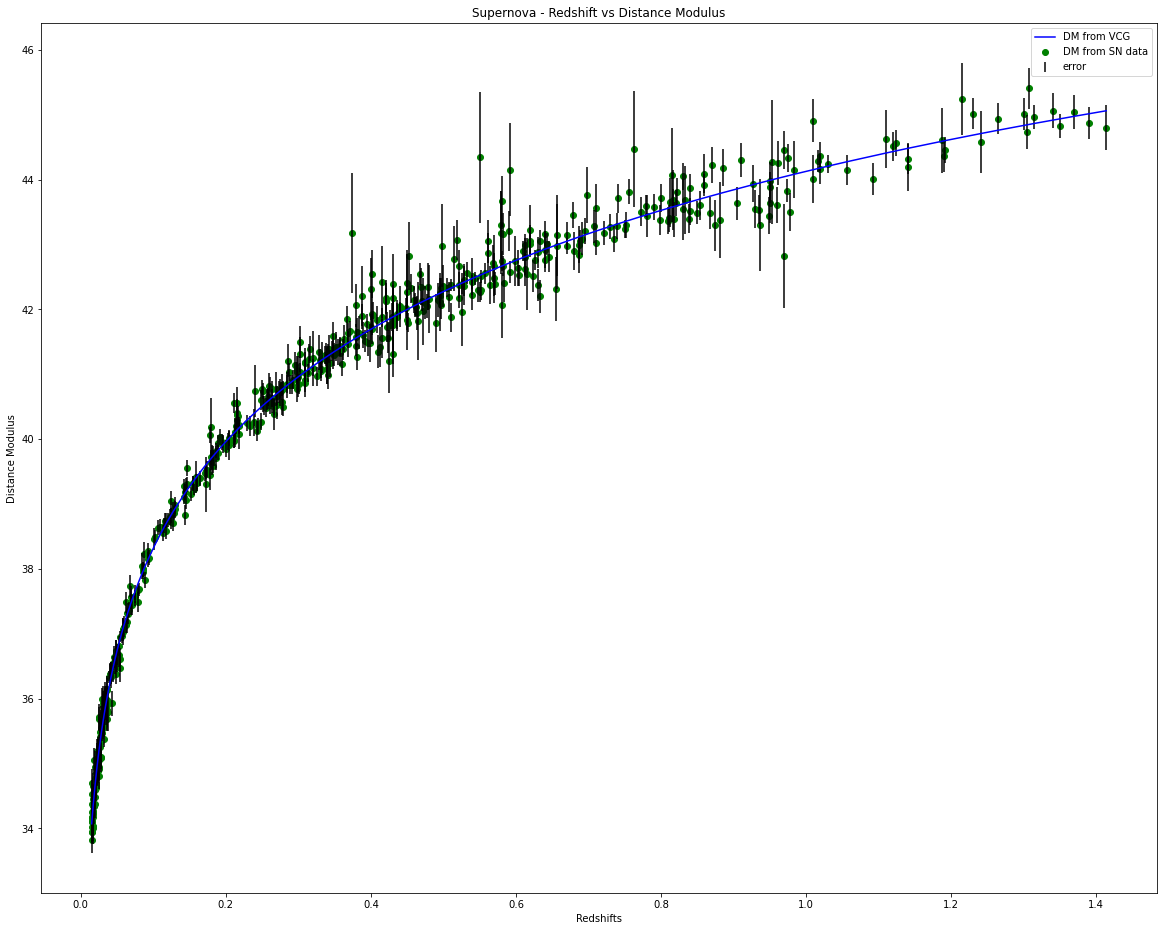

In [9]:
plt.xlabel("Redshifts")
plt.ylabel("Distance Modulus")
plt.title("Supernova - Redshift vs Distance Modulus")
plt.scatter(sort_data_SN.Z_SN,sort_data_SN.DMdata_SN,color='green',label='DM from SN data')
plt.plot(sort_data_SN.Z_SN,sort_data_SN.DMth_SN,color='blue',label='DM from VCG')
plt.errorbar(sort_data_SN.Z_SN,sort_data_SN.DMdata_SN,yerr=sort_data_SN.Error_DM_SN,fmt=' ',ecolor='black', label='error')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

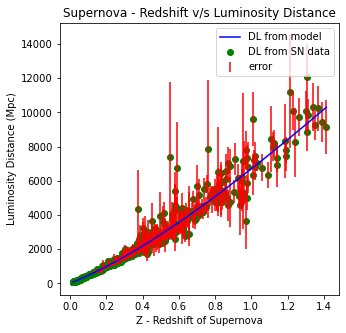

In [10]:
plt.errorbar(sort_data_SN.Z_SN,sort_data_SN.dLdata_SN,yerr=sort_data_SN.Error_DL_SN,fmt=' ',ecolor='red', label='error')
plt.plot(sort_data_SN.Z_SN,sort_data_SN.dLth_SN,color='blue', label='DL from model')
plt.scatter(sort_data_SN.Z_SN,sort_data_SN.dLdata_SN,color='green', label='DL from SN data')
plt.xlabel("Z - Redshift of Supernova")
plt.ylabel("Luminosity Distance (Mpc)")
plt.title("Supernova - Redshift v/s Luminosity Distance")
plt.legend(loc='best')
plt.show()

In [11]:
name=np.array(['GW190521','GW190706_222641','GW190413_134308','GW190514_065416','GW190719_215514','GW190521',"GW190909_114149","GW190413_052954",'GW190803_022701','GW190731_140936','GW190727_060333','GW190620_030421','GW190421_213856','GW170729','GW190602_175927','GW190527_092055','GW190519_153544','GW190424_180648','GW190929_012149','GW190828_063405','GW190701_203306','GW190513_205428','GW170823','GW190517_055101','GW190915_235702','GW190828_065509','GW190408_181802','GW190910_112807','GW190512_180714','GW190503_185404','GW190521_074359','GW170818','GW151012','GW170809','GW170104','GW190728_064510','GW190708_232457','GW190630_185205','GW190720_000836','GW190707_093326','GW190930_133541','GW190412','GW190924_021846','GW170814','GW151226','GW150914','GW190426_152155','GW200115_042309','GW170608','GW200105_162426','GW190814','GW190425','GW170817'])
full_DL_GW=np.array([[5300.0,2400,-2600],[4420.0,2590,-1930],[4450,2480,-2120],[4130.0,2650,-2170],[3940.0,2590,-2000],[3920.0,2190,-1950],[3770.0,3270,-2220],[3550.0,2270,-1660],[3270.0,1950,-1580],[3300.0,2390,-1720],[3300.0,1540,-1500],[2810.0,1680,-1310],[2880.0,1370,-1380],[2840.0,1400,-1360],[2690.0,1790,-1120],[2490.0,2480,-1240],[2530.0,1830,-920],[2200.0,1580,-1160],[2130.0,3650,-1050],[2130.0,660,-930],[2060.0,760,-730],[2060.0,880,-800],[1940.0,970,-900],[1860.0,1620,-840],[1620.0,710,-610],[1600.0,620,-600],[1550.0,400,-600],[1460.0,1030,-580],[1430.0,550,-550],[1450.0,690,-630],[1240.0,400,-570],[1060.0,420,-380],[1080.0,550,-490],[1030.0,320,-390],[990.0,440,-430],[870.0,260,-370],[880.0,330,-390],[890.0,560,-370],[790.0,690,-320],[770.0,380,-370],[760.0,360,-320],[740.0,140,-170],[570.0,220,-220],[600.0,150,-220],[450.0,180,-190],[440.0,150,-170],[370.0,180,-160],[300.0,150,-100],[320.0,120,-110],[280.0,110,-110],[241.0,41,-45],[159.0,69,-72],[40.0,7,-15]])
full_Z_GW=np.array([[0.82,0.28,-0.34],[0.71,0.32,-0.27],[0.71,0.31,-0.30],[0.67,0.33,-0.31],[0.64,0.33,-0.29],[0.64,0.28,-0.28],[0.62,0.41,-0.33],[0.59,0.29,-0.24],[0.55,0.26,-0.24],[0.55,0.31,-0.26],[0.55,0.21,-0.22],[0.49,0.23,-0.20],[0.49,0.19,-0.21],[0.49,0.19,-0.21],[0.47,0.25,-0.17],[0.44,0.34,-0.20],[0.44,0.25,-0.14],[0.39,0.23,-0.19],[0.38,0.49,-0.17],[0.38,0.10,-0.15],[0.37,0.11,-0.12],[0.37,0.13,-0.13],[0.35,0.15,-0.15],[0.34,0.24,-0.14],[0.3,0.11,-0.10],[0.3,0.10,-0.10],[0.29,0.06,-0.10],[0.28,0.16,-0.10],[0.27,0.09,-0.10],[0.27,0.11,-0.11],[0.24,0.07,-0.10],[0.21,0.07,-0.07],[0.21,0.09,-0.09],[0.2,0.05,-0.07],[0.2,0.08,-0.08],[0.18,0.05,-0.07],[0.18,0.06,-0.07],[0.18,0.10,-0.07],[0.16,0.12,-0.06],[0.16,0.07,-0.07],[0.15,0.06,-0.06],[0.15,0.03,-0.03],[0.12,0.04,-0.04],[0.12,0.03,-0.04],[0.09,0.04,-0.04],[0.09,0.03,-0.03],[0.08,0.04,-0.03],[0.07,0.03,-0.02],[0.07,0.02,-0.02],[0.06,0.02,-0.02],[0.053,0.009,-0.010],[0.04,0.01,-0.02],[0.01,0.00,-0.00]])
# Number of events
a=name.size

#Defining arrays
dldata_GW=np.zeros(a)
dlUP=np.zeros(a)
dlLOW=np.zeros(a)
dlTOP=np.zeros(a)
dlBOTTOM=np.zeros(a)
dmtop=np.zeros(a)
dmbottom=np.zeros(a)
Z_GW=np.zeros(a)
dmth_GW=np.zeros(a)
dmdata_GW=np.zeros(a)
dlth_GW = np.zeros(a)
dmtoperr=np.zeros(a)
dmbottomerr=np.zeros(a)
#defining variables for index of the above arrays
b=c=d=e=f=h=k=l=m=x=y=p=q=r=s=0
#extracting redshifts and DL from the full data
for i in full_Z_GW:
  Z_GW[e]+=i[0]
  e+=1
for i in full_DL_GW:
  dldata_GW[b]+=i[0]
  b+=1
#Upper and Lower limit of DL from data
for i in full_DL_GW:
  dlUP[c]+=i[0]+i[1]
  c+=1
for i in full_DL_GW:
  dlLOW[d]+=i[0]+i[2]
  d+=1
# Calculating upper and lower limit of Distance modulus from DL limits calculated above
for i in dlUP:
  dmtop[f]+=5*log(i,10)+25
  f+=1
for i in dlLOW:
  dmbottom[k]+=5*log(i,10)+25
  k+=1
#Calculating DM from DL given in data
for i in dldata_GW:
  dmdata_GW[h]+=5*log(i,10)+25
  h+=1
#Calculating differences in DL from its limits
for (i,j) in zip(dldata_GW,dlUP):
  dlTOP[x]+=j-i
  x+=1
for (i,j) in zip(dldata_GW,dlLOW):
  dlBOTTOM[y]=i-j
  y+=1
#upper and lower differences for errors
for (i,j) in zip(dmdata_GW,dmtop):
  dmtoperr[r]+=j-i
  r+=1
for (i,j) in zip(dmdata_GW,dmbottom):
  dmbottomerr[s]+=i-j
  s+=1
omega_m=.09
n=1.4545
# Calculating theoretical value of DL and DM from the model VCG
for redshift in Z_GW:
  g=quad(int_func,0,redshift)
  dlth_GW[l]+=(1+redshift)*g[0]*(300000/(H0)) 
  l+=1
for i in dlth_GW:
  dmth_GW[m]+=5*log(i,10)+25
  m+=1
# DL-h1 < DL < DL+h2,if h1<h2, take error to be h1 or vice versa
#new_error=np.zeros(a)
#for (i,j) in zip(dlTOP,dlBOTTOM):
 # if i<j:
#    new_error[p]+=i
#    p+=1
#  elif j<i:
#    new_error[q]+=j
 #   q+=1

new_error=np.zeros(a)
for i in range (a):
  if dmtoperr[i]>dmbottomerr[i]:
    new_error[p]+=dmtoperr[i]
  elif dmtoperr[i]<dmbottomerr[i]:
    new_error[p]+=dmbottomerr[i]
  else:
    new_error[p]+=dmtoperr[i]
  p+=1  
#for (i,j) in zip(dmtoperr,dmbottomerr):
#  if i<j:
 #  new_error[p]+=i
  # p+=1
#  elif j<i:
 #  new_error[q]+=j
  # q+=1

label1 = {"Event_Name":name,"Z_GW":Z_GW,"dLdata_GW":dldata_GW,"DMdata_GW": dmdata_GW,"dLth_GW":dlth_GW, "DMth_GW": dmth_GW,"DL_Uplimit": dlUP, "DL_Lowlimit": dlLOW,"DL_UP_Error":dlTOP,"DL_LOW_Error":dlBOTTOM,  "DM_UpError": dmtoperr, "DM_LowError":dmbottomerr, "Error_DM_GW":new_error}
data_GW=pd.DataFrame(label1)
#data_GW.to_excel(excel_writer = "/root/Github_Repos/VCG_GW/GWTColdGW.xlsx")

In [12]:
print(data_GW)

         Event_Name   Z_GW  dLdata_GW  DMdata_GW      dLth_GW    DMth_GW  \
0          GW190521  0.820     5300.0  43.621379  5233.836220  43.594101   
1   GW190706_222641  0.710     4420.0  43.227111  4379.331490  43.207039   
2   GW190413_134308  0.710     4450.0  43.241800  4379.331490  43.207039   
3   GW190514_065416  0.670     4130.0  43.079750  4077.269680  43.051847   
4   GW190719_215514  0.640     3940.0  42.977481  3854.001782  42.929560   
5          GW190521  0.640     3920.0  42.966430  3854.001782  42.929560   
6   GW190909_114149  0.620     3770.0  42.881707  3706.779739  42.844984   
7   GW190413_052954  0.590     3550.0  42.751142  3488.467146  42.713173   
8   GW190803_022701  0.550     3270.0  42.572739  3202.274289  42.527293   
9   GW190731_140936  0.550     3300.0  42.592570  3202.274289  42.527293   
10  GW190727_060333  0.550     3300.0  42.592570  3202.274289  42.527293   
11  GW190620_030421  0.490     2810.0  42.243532  2784.061282  42.223394   
12  GW190421

In [13]:
data_GWTC3 = pd.read_excel (r'/root/Github_Repos/VCG_GW/oldGW.xlsx')
data_GWTC3.index= np.arange(53,88)
print(data_GWTC3)

            Event_Name_GWTC3  luminosity_distance  luminosity_distance_lower  \
53        GW191103_012549-v1                  990                        520   
54        GW191105_143521-v1                 1150                        670   
55        GW191109_010717-v1                 1290                        640   
56        GW191113_071753-v1                 1370                        750   
57        GW191126_115259-v1                 1620                        880   
58        GW191127_050227-v1                 3400                       1500   
59        GW191129_134029-v1                  790                        460   
60        GW191204_110529-v1                 1800                        700   
61        GW191204_171526-v1                  650                        400   
62        GW191215_223052-v1                 1930                       1070   
63        GW191216_213338-v1                  340                        210   
64        GW191219_163120-v1            

In [14]:
mucollect=[data_GW.Z_GW,data_GWTC3.redshift]
finalredshift = pd.concat(mucollect)

namecollect=[data_GW.Event_Name,data_GWTC3.Event_Name_GWTC3]
finalevents = pd.concat(namecollect)

dlcollect=[data_GW.dLdata_GW,data_GWTC3.luminosity_distance]
finaldl = pd.concat(dlcollect)

dlupcollect=[data_GW.DL_Uplimit,data_GWTC3.luminosity_distance_upper]
finaldlup = pd.concat(dlupcollect)

dllowcollect=[data_GW.DL_Lowlimit,data_GWTC3.luminosity_distance_lower]
finaldllow = pd.concat(dllowcollect)

a=finalevents.size

#Defining arrays
dlTOP=np.zeros(a)
dlBOTTOM=np.zeros(a)
dmtop=np.zeros(a)
dmbottom=np.zeros(a)
dmth3_GW=np.zeros(a)
dmdata_GW=np.zeros(a)
dlth3_GW = np.zeros(a)
dmtoperr=np.zeros(a)
dmbottomerr=np.zeros(a)
#defining variables for index of the above arrays
f=h=k=l=m=x=y=p=q=r=s=0

# Calculating upper and lower limit of Distance modulus from DL limits calculated above
for i in finaldlup:
  dmtop[f]+=5*log(i,10)+25
  f+=1
for i in finaldllow:
  dmbottom[k]+=5*log(i,10)+25
  k+=1
#Calculating DM from DL given in data
for i in finaldl:
  dmdata_GW[h]+=5*log(i,10)+25
  h+=1
#upper and lower differences for errors
for (i,j) in zip(dmdata_GW,dmtop):
  dmtoperr[r]+=j-i
  r+=1
for (i,j) in zip(dmdata_GW,dmbottom):
  dmbottomerr[s]+=i-j
  s+=1
omega_m=.09
n=1.4545

# Calculating theoretical value of DL and DM from the model VCG
for i in finalredshift:
  g=quad(int_func,0,i)
  dlth3_GW[l]+=(1+i)*g[0]*(300000/(H0))  
  l+=1
for i in dlth3_GW:
  dmth3_GW[m]+=5*log(i,10)+25
  m+=1
    
new_error=np.zeros(a)
for i in range (a):
  if dmtoperr[i]<dmbottomerr[i]:
    new_error[p]+=dmtoperr[i]
  elif dmtoperr[i]>dmbottomerr[i]:
    new_error[p]+=dmbottomerr[i]
  else:
    new_error[p]+=dmtoperr[i]
  p+=1   
label2 = {"Fin_Event_Name":finalevents,"Fin_Z_GW":finalredshift,"Fin_dLdata_GW":finaldl,"Fin_DMdata_GW": dmdata_GW,"Fin_dLth_GW":dlth3_GW, "Fin_DMth_GW": dmth3_GW,"Fin_DL_UpError": finaldlup, "Fin_DL_LowError": finaldllow,  "DM_UpError": dmtoperr, "DM_LowError":dmbottomerr, "Error_DM_GW":new_error}
Fin_data_GW=pd.DataFrame(label2)

In [15]:
namecollect=[data_GW.Event_Name,data_GWTC3.Event_Name_GWTC3]
finalevents = pd.concat(namecollect)

In [16]:
sort_data_GW=Fin_data_GW.sort_values(by=['Fin_Z_GW'])
sort_data_GW

,Fin_Event_Name,Fin_Z_GW,Fin_dLdata_GW,Fin_DMdata_GW,Fin_dLth_GW,Fin_DMth_GW,Fin_DL_UpError,Fin_DL_LowError,DM_UpError,DM_LowError,Error_DM_GW
52,GW170817,0.010,40.0,33.010300,43.304313,33.182656,47.0,25.0,0.350189,1.020600,0.350189
51,GW190425,0.040,159.0,36.006986,177.068552,36.240707,228.0,87.0,0.782689,1.309389,0.782689
50,GW190814,0.053,241.0,36.910085,236.801644,36.871924,282.0,196.0,0.341160,0.448805,0.341160
49,GW200105_162426,0.060,280.0,37.235790,269.402514,37.152008,390.0,170.0,0.719533,1.083546,0.719533
68,GW200115_042309-v2,0.060,290.0,37.311990,269.402514,37.152008,440.0,190.0,0.905273,0.918222,0.905273
...,...,...,...,...,...,...,...,...,...,...,...
2,GW190413_134308,0.710,4450.0,43.241800,4379.331490,43.207039,6930.0,2330.0,0.961866,1.405020,0.961866
1,GW190706_222641,0.710,4420.0,43.227111,4379.331490,43.207039,7010.0,2490.0,1.001479,1.246115,1.001479
0,GW190521,0.820,5300.0,43.621379,5233.836220,43.594101,7700.0,2700.0,0.811074,1.464561,0.811074
84,GW200308_173609-v1,0.830,5400.0,43.661969,5313.135131,43.626754,8100.0,2800.0,0.880456,1.426179,0.880456


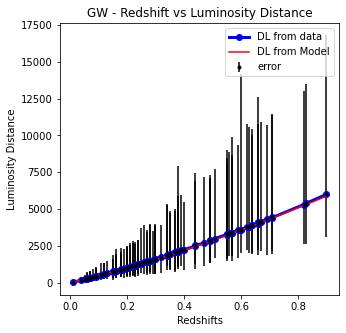

In [17]:
plt.errorbar(sort_data_GW.Fin_Z_GW,sort_data_GW.Fin_dLdata_GW,yerr=(sort_data_GW.Fin_DL_LowError,sort_data_GW.Fin_DL_UpError),fmt='.k',ecolor='black', label='error')
#plt.errorbar(sort_data_GW.Fin_Z_GW,sort_data_GW.DMdata_GW,yerr=(dmBOTTOM,dmTOP),fmt='.k',ecolor='black', label='error')
plt.plot(sort_data_GW.Fin_Z_GW,sort_data_GW.Fin_dLdata_GW,color='blue',linewidth=3,label='DL from data',marker='o')
plt.plot(sort_data_GW.Fin_Z_GW,sort_data_GW.Fin_dLth_GW,color="red",label='DL from Model')
plt.xlabel('Redshifts')
plt.ylabel('Luminosity Distance')
plt.title('GW - Redshift vs Luminosity Distance')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

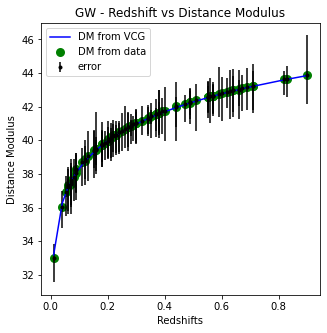

In [18]:
plt.errorbar(sort_data_GW.Fin_Z_GW,sort_data_GW.Fin_DMdata_GW,yerr=(dmbottomerr,dmtoperr),fmt='.k',ecolor='black', label='error')
plt.scatter(sort_data_GW.Fin_Z_GW,sort_data_GW.Fin_DMdata_GW,linewidth=3,label='DM from data',color='green',marker='o')
plt.plot(sort_data_GW.Fin_Z_GW,sort_data_GW.Fin_DMth_GW,color="blue",label='DM from VCG')
plt.xlabel('Redshifts')
plt.ylabel('Distance Modulus')
plt.title('GW - Redshift vs Distance Modulus')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [22]:
# Chi_square test considering only SN data points
chi_sq = []
collection=[]
col=[]
dlth_SN= np.zeros(len(z))
dmth_SN= np.zeros(len(z))
chi_sq=np.zeros(len(z))
a=0
b=0
for omega_m in np.linspace(0.01,0.2,20): 
  for n in np.linspace(-1.5,3,25):
    for redshift in data_SN.Z_SN:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_SN[b]+=dl1
      dmth_SN[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      data_SN["DMchi"]=dmth_SN
    a=0
    b=0
    C2=0
    C1=0
    for i in data_SN.Error_DM_SN:
      C2+=1/np.power(i,2)
    data_SN["dC1"]=(data_SN["DMchi"]-data_SN["DMdata_SN"])/(data_SN["Error_DM_SN"]**2)
    for i in data_SN["dC1"]:
      C1+=i
    del data_SN["dC1"]
    chi_sq_part1 = 0
    data_SN["Part1"]=((data_SN["DMchi"]-data_SN["DMdata_SN"])/data_SN["Error_DM_SN"])**2
    for i in data_SN.Part1:
      chi_sq_part1+=i
    del data_SN["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    np_array=np.asarray(col)
    collection.append([chi_sq,omega_m,n])
    dlth_SN = np.zeros(len(z))
    dmth_SN = np.zeros(len(z))
    del data_SN["DMchi"]

print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
print("1sigma")    
for i in collection:
  if i[0]<=min(col) + 2.3:
    print(i)
print("2 sigma")    
for i in collection:
  if i[0]==min(col) + 2*2.3:
    print(i)
%time

500
[563.4223943742056, 0.09, 1.5]
1sigma
[564.6652942735573, 0.05, 1.875]
[564.515224067459, 0.060000000000000005, 1.6875]
[565.6151425827372, 0.060000000000000005, 1.875]
[563.667586649899, 0.06999999999999999, 1.6875]
[563.6677454112665, 0.08, 1.5]
[564.9343800187709, 0.08, 1.6875]
[565.0653854045698, 0.09, 1.3125]
[563.4223943742056, 0.09, 1.5]
[563.4464363089564, 0.09999999999999999, 1.3125]
[565.2130944682208, 0.09999999999999999, 1.5]
[564.5693702946799, 0.11, 1.125]
[563.9844343451167, 0.11, 1.3125]
[563.9901554205177, 0.12, 1.125]
[564.8850011011946, 0.13, 0.9375]
[565.4686950139165, 0.13, 1.125]
[565.4752864511695, 0.14, 0.9375]
2 sigma
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [24]:
om1=[]
n1=[]
for i in collection:
    if i[0]<=min(col) + 2*2.3:
        if i[0]>= min(col):
            om1.append(i[1])
            n1.append(i[2])
print(min(om1))
print(max(om1))
print(min(n1))
print(max(n1))

0.02
0.16
0.5625
2.0625


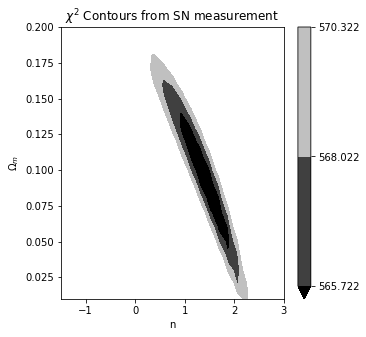

In [60]:
#plt.style.use('seaborn-white')
n= np.linspace(-1.5,3,25)
omega_m =np.linspace(0.01,0.2,20)
np_array=np.asarray(col)
t1=np_array.reshape(20,25)
#fig,ax=plt.subplots(1,1)
levels = np.array([min(col)+2.3, min(col)+2*2.3, min(col)+3*2.3])
contours =plt.contourf(n,omega_m, t1,levels=levels, extend='min',cmap = 'gist_gray')
plt.xlabel('n')
plt.ylabel('$\Omega_m$')
plt.rcParams["figure.figsize"] = (5,5)
plt.title("$\chi^2$ Contours from SN measurement")
#plt.clabel(contours, inline=True, fontsize=8, colors='b')
#cp.set_clim(vmin=560,vmax=600)
#cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
plt.colorbar() # Add a colorbar to a plot
#plt.clim(0, 150) 

import random
import matplotlib.pyplot as plt

s_x = random.sample(range(0,100),20)
s_y = random.sample(range(0,100),20)

s = plt.scatter(s_x,s_y,c = s_x, cmap='viridis', vmin = 0, vmax =150)

c = plt.colorbar()

n= np.linspace(-10,4,441)
omega_m =np.linspace(0.01,0.36,36)
np_array=np.asarray(col)
t1=np_array.reshape(36,441)
plt.contourf(n,omega_m, t1)

## Just for record as compiling takes around 25 minutes.
# Chi_square test considering only SN data points
chi_sq = []
collection=[]
col=[]
dlth_SN= np.zeros(len(z))
dmth_SN= np.zeros(len(z))
chi_sq=np.zeros(len(z))
a=0
b=0
for omega_m in np.linspace(0.01,0.36,36): 
  for n in np.linspace(-10,4,441):
    for redshift in data_SN.Z_SN:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_SN[b]+=dl1
      dmth_SN[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      data_SN["DMchi"]=dmth_SN
    a=0
    b=0
    C2=0
    C1=0
    for i in data_SN.Error_DM_SN:
      C2+=1/np.power(i,2)
    data_SN["dC1"]=(data_SN["DMchi"]-data_SN["DMdata_SN"])/(data_SN["Error_DM_SN"]**2)
    for i in data_SN["dC1"]:
      C1+=i
    del data_SN["dC1"]
    chi_sq_part1 = 0
    data_SN["Part1"]=((data_SN["DMchi"]-data_SN["DMdata_SN"])/data_SN["Error_DM_SN"])**2
    for i in data_SN.Part1:
      chi_sq_part1+=i
    del data_SN["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,omega_m,n])
    dlth_SN = np.zeros(len(z))
    dmth_SN = np.zeros(len(z))
    del data_SN["DMchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
%time

15876
[563.25090425986, 0.09, 1.4545454545454533]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

n in np.linspace(-10,4,441)
omega_m in np.linspace(0.01,0.36,36)
np_array=np.asarray(col)
np_array.reshape(36,441)
plt.contour(n,omega_m, np_array)


a=np.random.rand(5)
b=np.random.rand(10)
ch=np.random.rand(50)
ch1=ch.reshape(10,5)
plt.contour(a, b, ch1)

In [60]:
# Chi_square test considering only GW data points
chi_sq = []
collection=[]
nconf=np.zeros(15876)
omegconf=np.zeros(15876)
col1=[]
dlth_GW= np.zeros(88)
dmth_GW= np.zeros(88)
chi_sq=np.zeros(88)
a=0
b=0
c=0
d=0
for omega_m in np.linspace(0.01,1,10): 
  for n in np.linspace(-1000000000000,4,10):
    for redshift in Fin_data_GW.Fin_Z_GW:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_GW[b]+=dl1
      dmth_GW[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      Fin_data_GW["DMchi"]=dmth_GW
    a=0
    b=0
    C2=0
    C1=0
    for i in new_error:
      C2+=1/np.power(i,2)
    Fin_data_GW["dC1"]=(Fin_data_GW["DMchi"]-Fin_data_GW["Fin_DMdata_GW"])/(new_error**2)
    for i in Fin_data_GW["dC1"]:
      C1+=i
    del Fin_data_GW["dC1"]
    chi_sq_part1 = 0
    Fin_data_GW["Part1"]=((Fin_data_GW["DMchi"]-Fin_data_GW["Fin_DMdata_GW"])/new_error)**2
    for i in Fin_data_GW.Part1:
      chi_sq_part1+=i
    del Fin_data_GW["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col1.append(chi_sq)
    collection.append([chi_sq,omega_m,n])
    c+=1
    d+=1
    np_array=np.asarray(col)
    dlth_GW = np.zeros(88)
    dmth_GW = np.zeros(88)
    del Fin_data_GW["DMchi"]
     
print(len(collection))
for i in collection:
  if i[0]==min(col1):
    print(i)  
for i in collection:
    if i[0]<=min(col1) + 2.3:
        if i[0]>= min(col1):
            print(i)

%time

100
[5.649716204001809, 0.56, -1000000000000.0]
[5.649716204001809, 0.56, -888888888888.4445]
[5.649716204001809, 0.56, -777777777776.8889]
[5.649716204001809, 0.56, -666666666665.3333]
[5.649716204001809, 0.56, -555555555553.7778]
[5.649716204001809, 0.56, -444444444442.22217]
[5.649716204001809, 0.56, -333333333330.6666]
[5.649716204001809, 0.56, -222222222219.11108]
[5.649716204001809, 0.56, -111111111107.55554]
[5.649716204001809, 0.56, -1000000000000.0]
[5.649716204001809, 0.56, -888888888888.4445]
[5.649716204001809, 0.56, -777777777776.8889]
[5.649716204001809, 0.56, -666666666665.3333]
[5.649716204001809, 0.56, -555555555553.7778]
[5.649716204001809, 0.56, -444444444442.22217]
[5.649716204001809, 0.56, -333333333330.6666]
[5.649716204001809, 0.56, -222222222219.11108]
[5.649716204001809, 0.56, -111111111107.55554]
[6.14724446575871, 0.67, -1000000000000.0]
[6.14724446575871, 0.67, -888888888888.4445]
[6.14724446575871, 0.67, -777777777776.8889]
[6.14724446575871, 0.67, -6666666

In [61]:
om1=[]
n1=[]
for i in collection:
    if i[0]<=min(col1) + 2*2.3:
        if i[0]>= min(col1):
            om1.append(i[1])
            n1.append(i[2])

print(min(om1))
print(max(om1))
print(min(n1))
print(max(n1))

0.01
0.67
-1000000000000.0
4.0


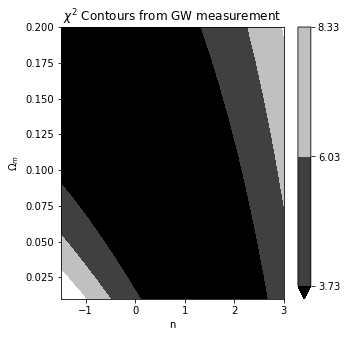

In [52]:
n= np.linspace(-1.5,3,25)
omega_m = np.linspace(0.01,0.2,20)
np_array1=np.asarray(col1)
np_array=np.asarray(col)
t1=np_array.reshape(20,25)
t2=np_array1.reshape(20,25)
#fig,ax=plt.subplots(1,1)
levels =  np.array([min(col)+2.3, min(col)+2*2.3, min(col)+3*2.3])
levels1 =  np.array([min(col1)+2.3, min(col1)+2*2.3, min(col1)+3*2.3])
#plt.contour(n,omega_m, t1,levels=levels, extend='min')
plt.contourf(n,omega_m, t2,levels=levels1, extend='min',cmap = 'gist_gray')
plt.xlabel('n')
plt.ylabel('$\Omega_m$')
plt.rcParams["figure.figsize"] = (6,5)
plt.title("$\chi^2$ Contours from GW measurement")
#figure(figsize=(4, 12))
#plt.clabel(contours, inline=True, fontsize=8, colors='b')
#cp.set_clim(vmin=560,vmax=600)
#cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
plt.colorbar() # Add a colorbar to a plot
plt.show()
#plt.clim(0, 150) 

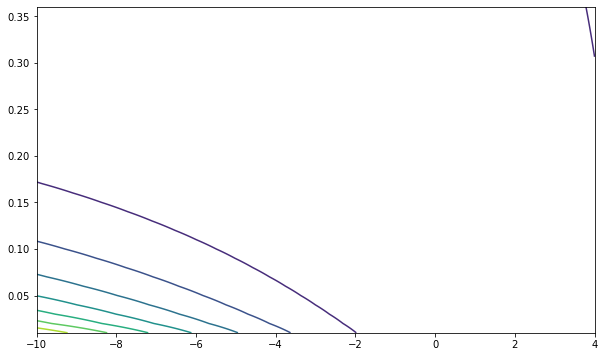

In [29]:
n =np.linspace(-10,4,441)
omega_m = np.linspace(0.01,0.36,36)
np_array=np.asarray(col)
t1=np_array.reshape(36,441)
plt.contour(n,omega_m, t1,cmap='seismic')

In [19]:
print(omegconf)
omegconf.size

[0.01 0.01 0.01 ... 0.36 0.36 0.36]


15876

In [20]:
print(nconf)
nconf.size

[-10.          -9.96818182  -9.93636364 ...   3.93636364   3.96818182
   4.        ]


15876

$y=\sqrt(2\chi^2) -\sqrt(2 d.o.f -1)$

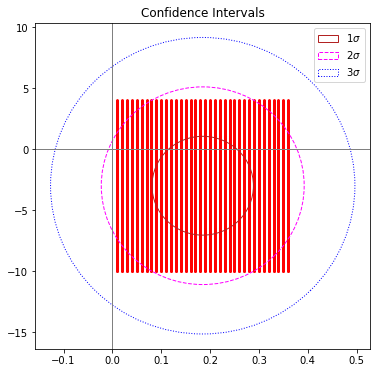

In [27]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))



ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

y=np.sqrt(2*1.42**2) - np.sqrt(2*86 - 1)
confidence_ellipse(omegconf, nconf, ax_nstd, n_std=y,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(omegconf, nconf, ax_nstd, n_std=y,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(omegconf, nconf, ax_nstd, n_std=y,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(omegconf, nconf, c='red', s=3)
ax_nstd.set_title('Confidence Intervals')
ax_nstd.legend()
plt.show()

## Just for record as compiling takes around 15 minutes.
# Chi_square test considering only GW data points
# Chi_square test considering only GW data points
chi_sq = []
collection=[]
col=[]
dlth_GW= np.zeros(88)
dmth_GW= np.zeros(88)
chi_sq=np.zeros(88)
a=0
b=0
for omega_m in np.linspace(0.01,0.36,36): 
  for n in np.linspace(-10,4,441):
    for redshift in Fin_data_GW.Fin_Z_GW:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_GW[b]+=dl1
      dmth_GW[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      Fin_data_GW["DMchi"]=dmth_GW
    a=0
    b=0
    C2=0
    C1=0
    for i in new_error:
      C2+=1/np.power(i,2)
    Fin_data_GW["dC1"]=(Fin_data_GW["DMchi"]-Fin_data_GW["Fin_DMdata_GW"])/(new_error**2)
    for i in Fin_data_GW["dC1"]:
      C1+=i
    del Fin_data_GW["dC1"]
    chi_sq_part1 = 0
    Fin_data_GW["Part1"]=((Fin_data_GW["DMchi"]-Fin_data_GW["Fin_DMdata_GW"])/new_error)**2
    for i in Fin_data_GW.Part1:
      chi_sq_part1+=i
    del Fin_data_GW["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,omega_m,n])
    dlth_GW = np.zeros(88)
    dmth_GW = np.zeros(88)
    del Fin_data_GW["DMchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
%time
15876
[1.4295787831692177, 0.21000000000000002, -1.536363636363637]
CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 19.6 µs